In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynadojo.systems.gilpin_maps import GilpinMapsSystem
from dynadojo.wrappers import SystemChecker, AlgorithmChecker
from dynadojo.utils.gilpinmaps import plot
from dynadojo.baselines.sindy import SINDy
from dynadojo.challenges import FixedComplexity
from dynadojo.baselines.lr import LinearRegression

/Users/hadilowda/Projects/dynadojo/.venv/lib/python3.10/site-packages/dysts/analysis.py:14: UserWarning: Neurokit2 must be installed before computing multiscale entropy
  warnings.warn("Neurokit2 must be installed before computing multiscale entropy")


(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Ikeda'}>)

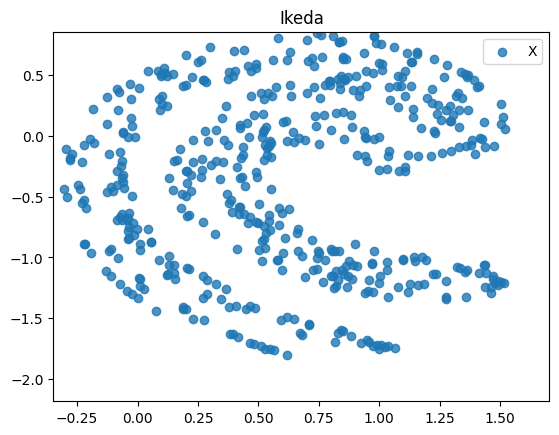

In [4]:
#plotting in-distribution trajectories
latent_dim = 2
embed_dim = 2
n = 10
timesteps = 500

system = SystemChecker(GilpinMapsSystem(latent_dim, embed_dim, "Ikeda"))
x0 = system.make_init_conds(n, in_dist=True) 
x = system.make_data(x0, timesteps=timesteps)


plot([x], labels=["X"], title="Ikeda")

(<Figure size 640x480 with 1 Axes>, <Axes: >)

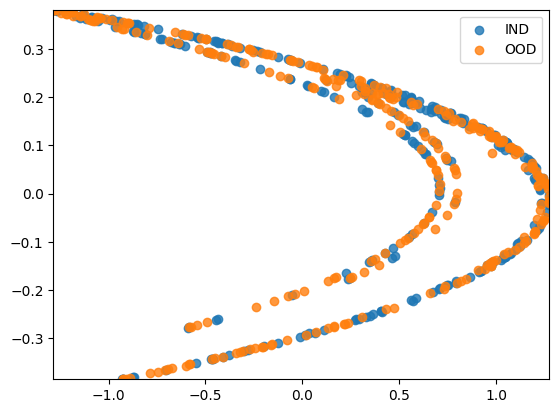

In [5]:
#plotting in-distribution and out-of-distribution trajectories
latent_dim = 2
embed_dim = latent_dim
n = 5
test_size = 2
timesteps = 300

system = SystemChecker(GilpinMapsSystem(latent_dim, embed_dim, "Henon"))
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(10, in_dist=False)
x = system.make_data(x0, timesteps=timesteps)
y = system.make_data(y0, timesteps=timesteps, noisy=True)

plot([x, y], labels=["IND", "OOD"], max_lines=test_size)

(5, 1, 2)
(10, 1, 2)


(<Figure size 640x480 with 1 Axes>, <Axes: >)

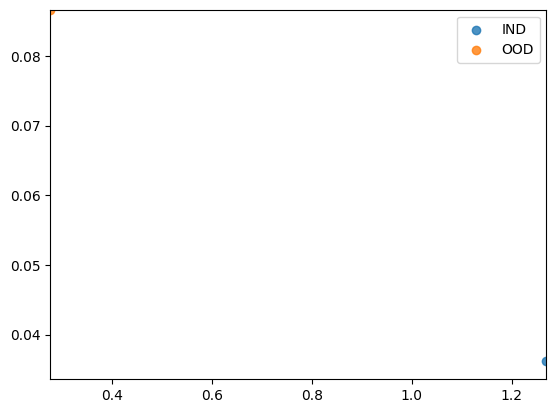

In [7]:
#plotting in-distribution and out-of-distribution initial conditions
import numpy as np

x0_3d = np.expand_dims(x0, axis=1)
y0_3d = np.expand_dims(y0, axis=1)

print(x0_3d.shape)
print(y0_3d.shape)

plot([x0_3d, y0_3d], target_dim=min(latent_dim, 3), labels=["IND", "OOD"], max_lines=test_size)

y_err=0.18408239289375775


(<Figure size 640x480 with 1 Axes>, <Axes: >)

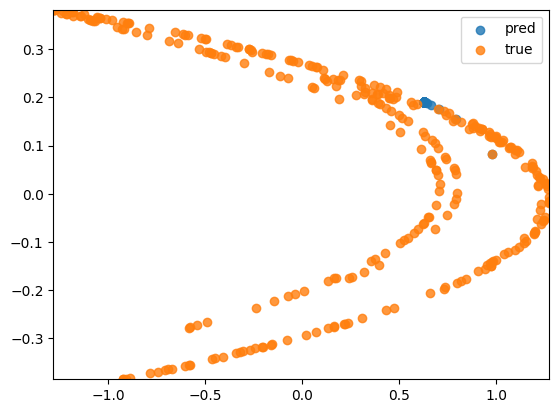

In [8]:
sindy = AlgorithmChecker(SINDy(embed_dim, timesteps, max_control_cost=0, seed=100))
sindy.fit(x)
y_pred = sindy.predict(y[:, 0], timesteps)
y_err = system.calc_error(y, y_pred)
print(f"{y_err=}")
plot([y_pred, y], target_dim=min(3, latent_dim), labels=["pred", "true"], max_lines=15)

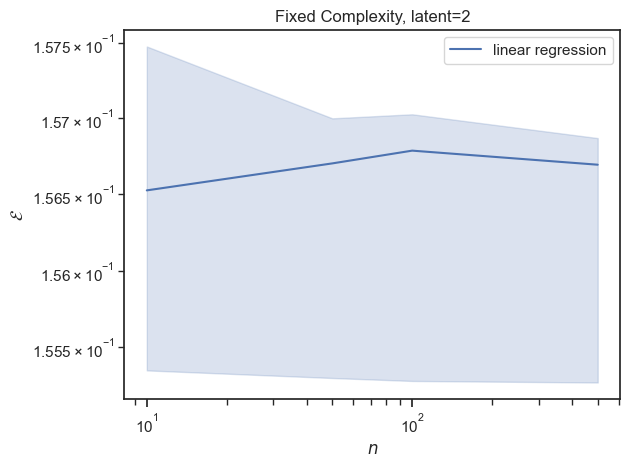

<Axes: title={'center': 'Fixed Complexity, latent=2'}, xlabel='$n$', ylabel='$\\mathcal{E}$'>

In [10]:
#Running fixed complexity challenge
challenge = FixedComplexity(
    l=2,
    e=2,
    t=10,
    N=[10, 50, 100, 500],
    system_cls=GilpinMapsSystem,
    trials=10,
    test_examples=50,
    test_timesteps=50,
    max_control_cost_per_dim=0,
    control_horizons=0,
    system_kwargs={"system_name": "Henon"},
)
data = challenge.evaluate(LinearRegression, id="linear regression")
challenge.plot(data)

/Users/hadilowda/Projects/dynadojo/src/dynadojo/utils/gilpinmaps.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


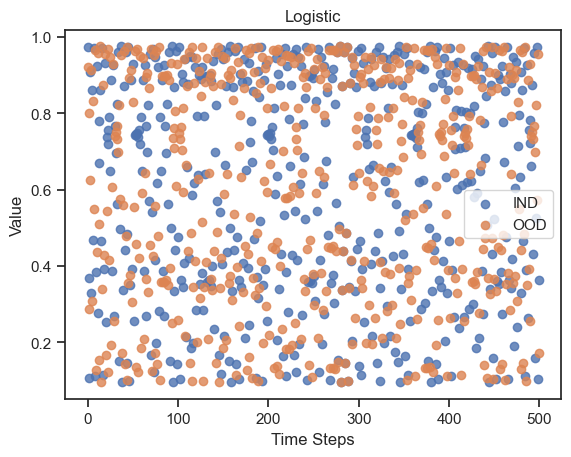

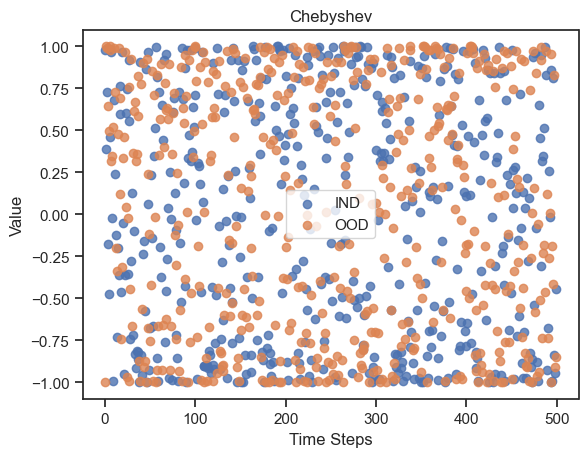

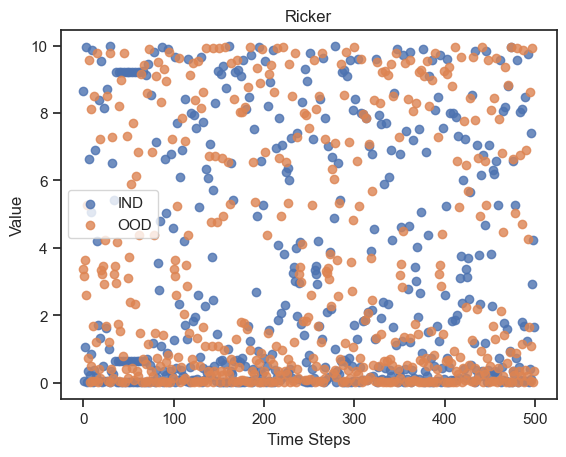

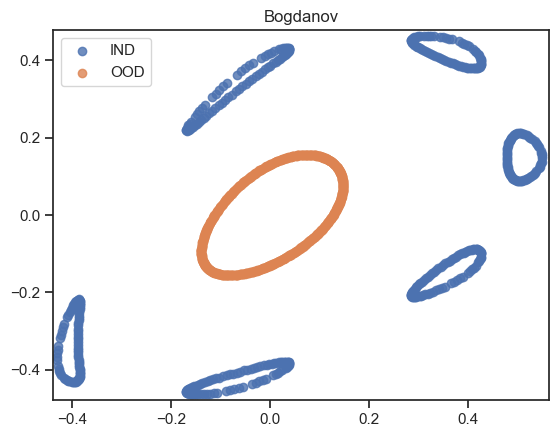

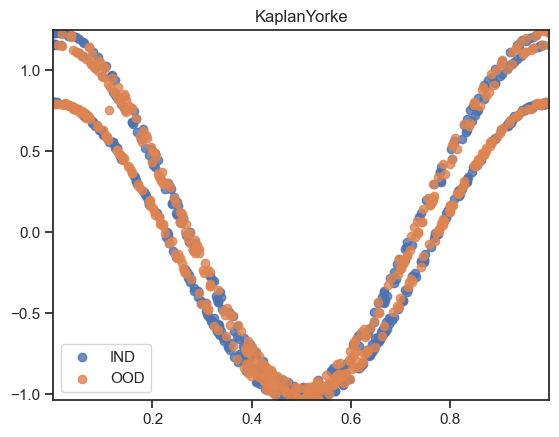

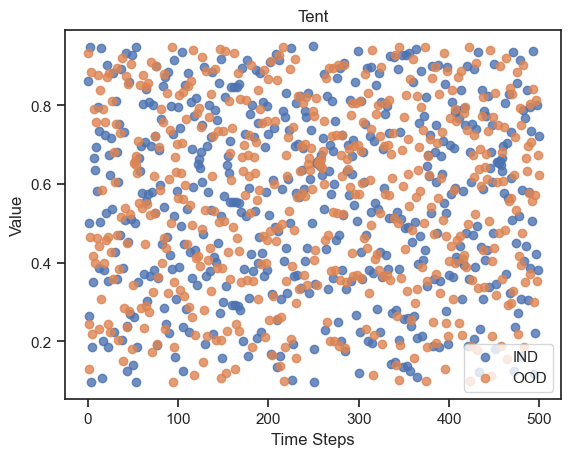

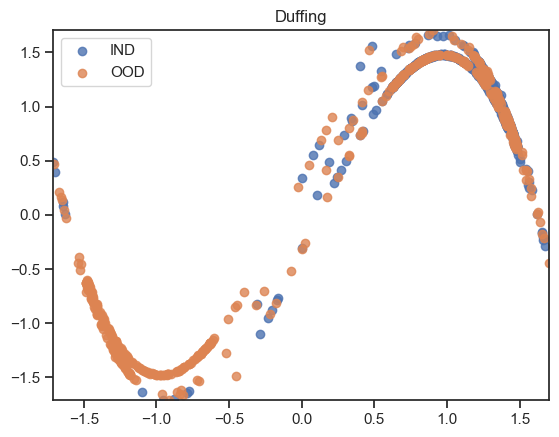

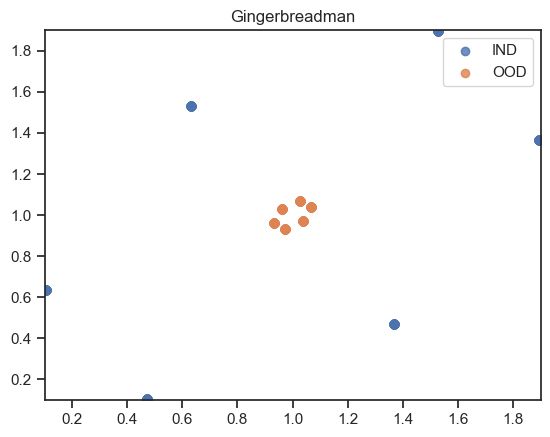

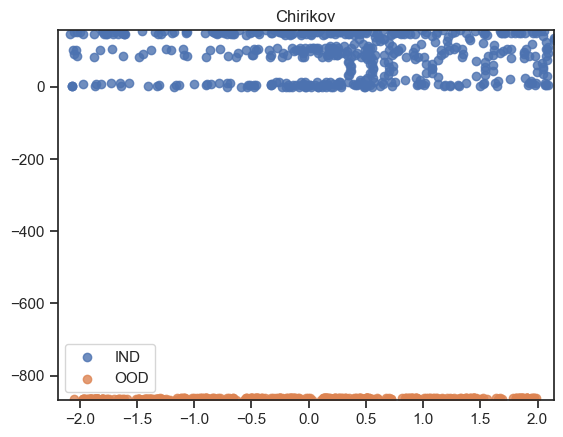

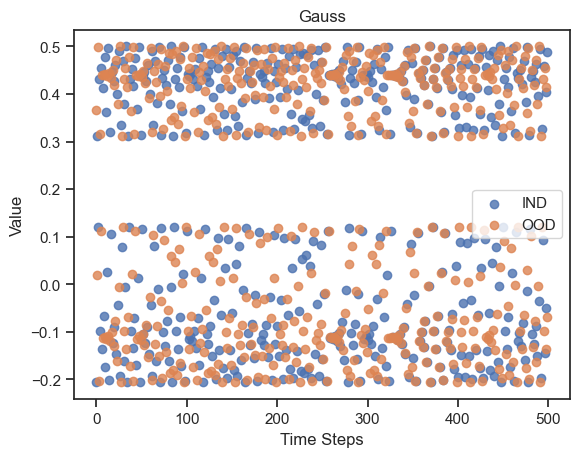

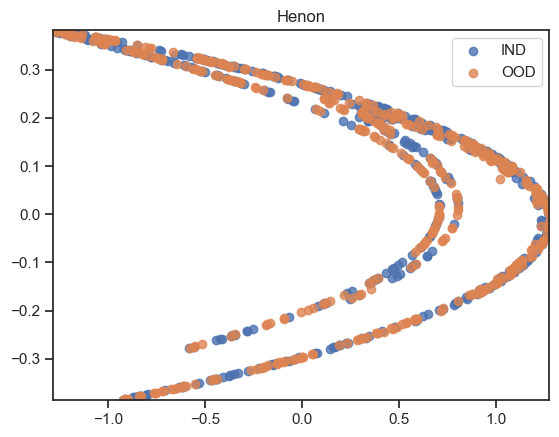

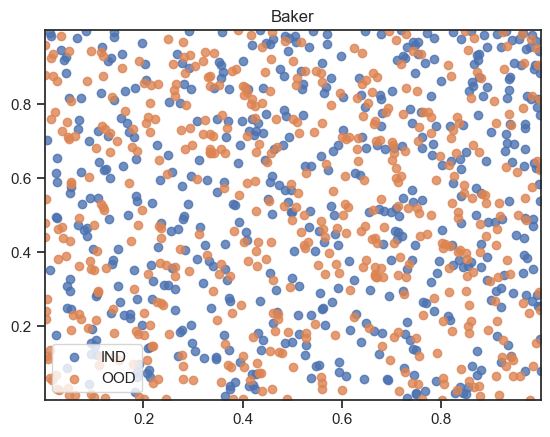

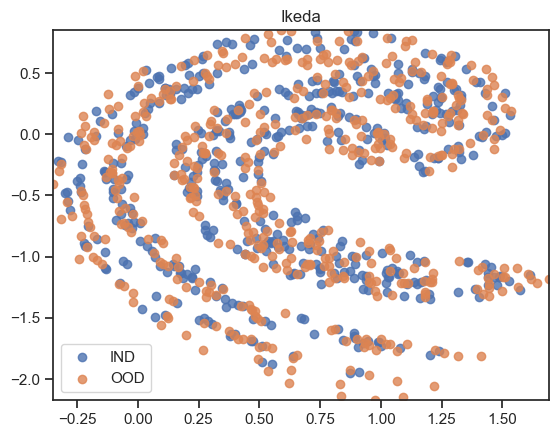

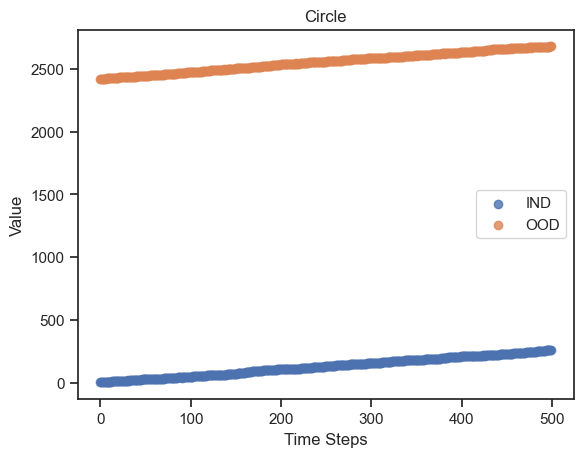

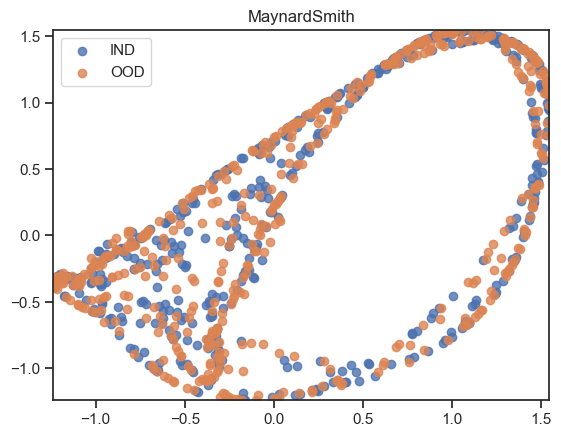

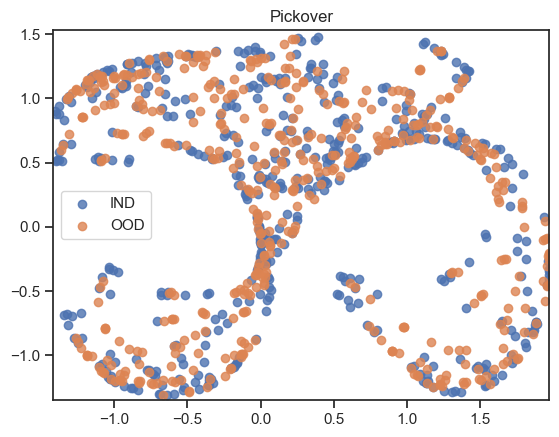

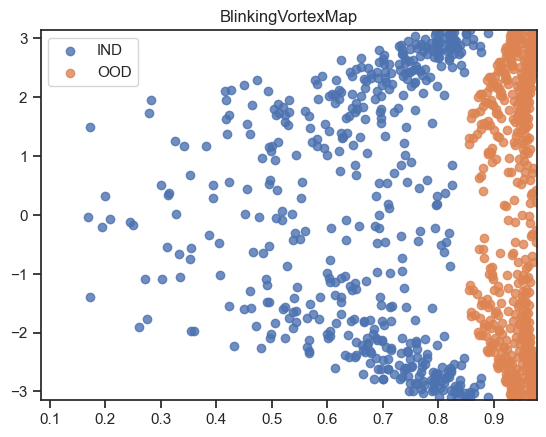

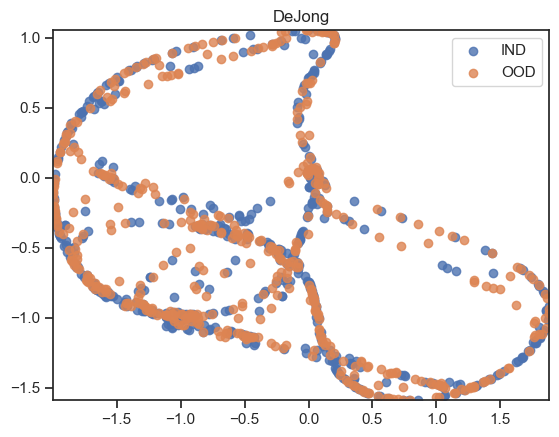

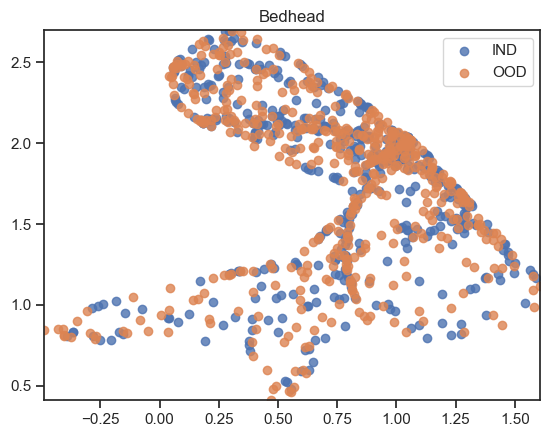

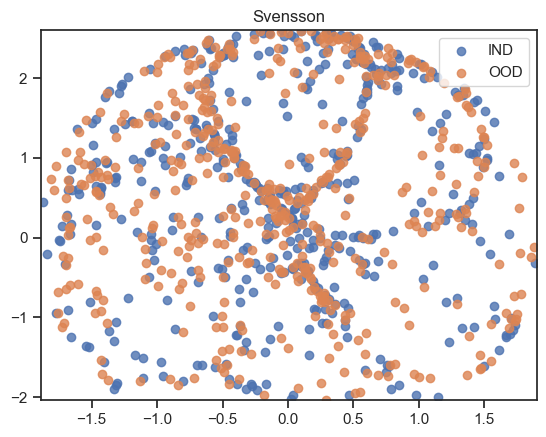

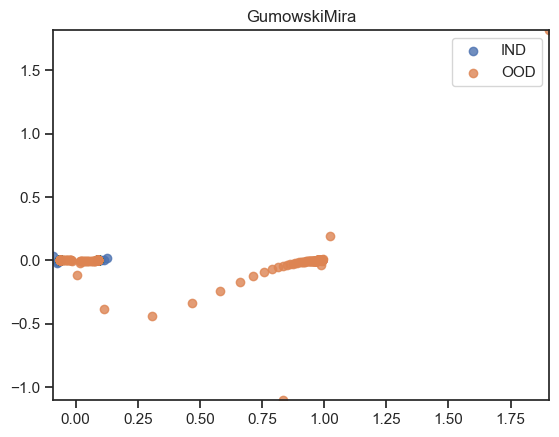

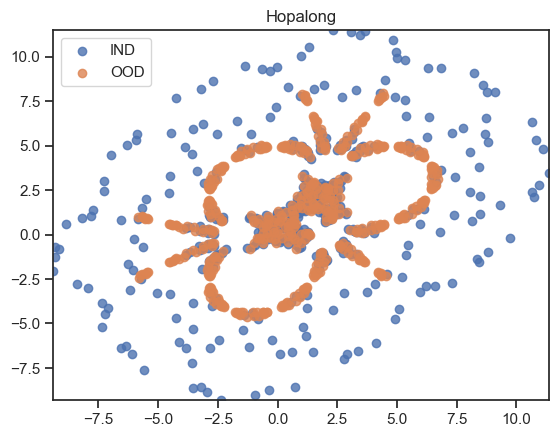

In [11]:
# plot in-distribution and out-of-distribution trajectories for all Gilpin Maps
latent_dim = 2
embed_dim = 2
n = 10
timesteps = 500
test_size = 2

GilpinMapsSystem.check_systems_availability()

for system_name in GilpinMapsSystem.available_systems:
    system = SystemChecker(GilpinMapsSystem(latent_dim, embed_dim, system_name))
    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(10, in_dist=False)
    x = system.make_data(x0, timesteps=timesteps)
    y = system.make_data(y0, timesteps=timesteps)
    labels = ["IND", "OOD"]
    plot([x, y], labels=labels, title= system_name, max_lines=test_size)